In [1]:
import os
import math
import numpy as np

import matplotlib as mpl
from matplotlib import gridspec
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{libertine}'
mpl.rc('font', family='serif')
from matplotlib.offsetbox import AnchoredText

from src.pipelines import dataset_outliers, dataset_local_outliers, dataset_global_outliers, dataset_abnormal_devices, dataset_dummy
from src.utils import parse_filename, normalize

In [2]:
num_devices = 10
num_data = 1000
dims = 100
subspace_frac = 1.0
frac_outlying_devices = 1.0
frac_outlying_data = 0.01
gamma = 0.5
delta = 0.2

In [3]:
function_id = "local"
if function_id == "local":
    function = dataset_local_outliers
    gamma = 0.5
    delta = 0.2
elif function_id == "global":
    function = dataset_global_outliers
elif function_id == "abnormal":
    function = dataset_abnormal_devices
    frac_outlying_data = 1.0
else:
    function_id = "dummy"
    function = dataset_dummy
    
function

<function src.pipelines.dataset_local_outliers(num_devices, n, dims, subspace_frac=0.1, frac_outlying_devices=0.1, frac_outlying_data=0.1, gamma=0.0, delta=0.0)>

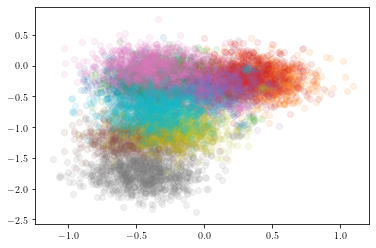

In [4]:
data, outliers = function(num_devices=num_devices, 
                                  n=num_data, 
                                  dims=dims, 
                                  subspace_frac=subspace_frac, 
                                  frac_outlying_devices=frac_outlying_devices, 
                                  frac_outlying_data=frac_outlying_data, 
                                  gamma=gamma, 
                                  delta=delta)

for d in data:
    plt.scatter(d.T[0], d.T[1], alpha=0.1)

In [5]:
save = True
if save:
    params_str = "{}_{}_{}_{}_{}_{}_{}_{}_{}".format(num_devices, 
                                                     num_data,
                                                     dims, 
                                                     subspace_frac, 
                                                     frac_outlying_devices,
                                                     frac_outlying_data, 
                                                     gamma, 
                                                     delta, 
                                                     function_id)
    dataname = os.path.join(os.getcwd(), "data", "synth", params_str + "_d")
    outname = os.path.join(os.getcwd(), "data", "synth", params_str + "_o")
    np.save(dataname, data)
    np.save(outname, outliers)

No handles with labels found to put in legend.


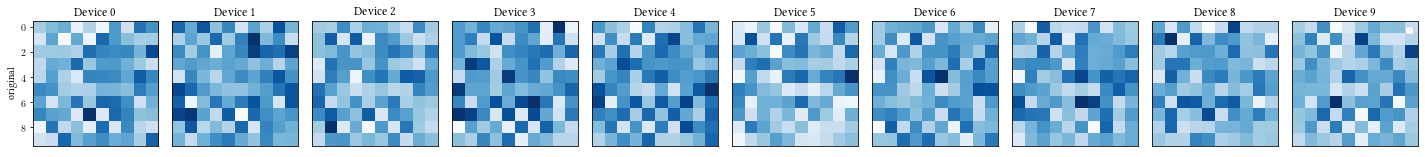

In [6]:
num_plots = 10  # how many digits we will display
fig = plt.figure(figsize=(20, 5))
side_length = int(math.sqrt(dims))
for i in range(num_plots):
    example = data[i][-1].reshape(side_length, side_length)

    # display original
    ax = plt.subplot(1, num_plots, i + 1)
    plt.imshow(example, cmap="Blues")
    ax.get_xaxis().set_visible(False)
    ax.set_title("Device {}".format(i))
    if i == 0:
        ax.set_ylabel("original")
    else:
        ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.legend()
plt.show()

(10, 1000, 100)


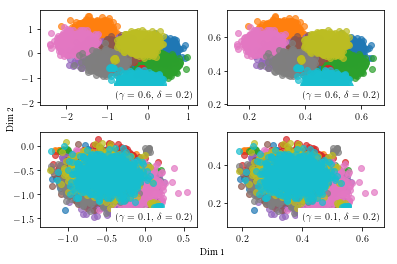

In [7]:
plotting = True
if plotting:
    
    print(data.shape)
    fig = plt.figure()

    markers = ["o", "v", "s", "o", "v", "s", "o", "v", "s", "o", "v", "s"]
    ax = plt.subplot(221)
    gamma = 0.6
    delta = 0.2
    data, outliers = function(num_devices=num_devices, 
                                      n=num_data, 
                                      dims=dims, 
                                      subspace_frac=subspace_frac, 
                                      frac_outlying_devices=frac_outlying_devices, 
                                      frac_outlying_data=frac_outlying_data, 
                                      gamma=gamma, 
                                      delta=delta)
    for i, d in enumerate(data):
        plt.scatter(d.T[0], d.T[1], alpha=0.7)
    text = AnchoredText(r"$(\gamma={},\ \delta={})$".format(gamma, delta), loc=4, frameon=False, pad=0.0, prop={"backgroundcolor": 'white'})
    plt.setp(text.patch, facecolor='white', alpha=0.2)
    ax.add_artist(text)
    
    ax = plt.subplot(222)
    data = normalize(data)
    
    for i, d in enumerate(data):
        plt.scatter(d.T[0], d.T[1], alpha=0.7)
    text = AnchoredText(r"$(\gamma={},\ \delta={})$".format(gamma, delta), loc=4, frameon=False, pad=0.0, prop={"backgroundcolor": 'white'})
    plt.setp(text.patch, facecolor='white', alpha=0.75)
    ax.add_artist(text)
    
    ax = plt.subplot(223)
    gamma = 0.1
    delta = 0.2
    data, outliers = function(num_devices=num_devices, 
                                      n=num_data, 
                                      dims=dims, 
                                      subspace_frac=subspace_frac, 
                                      frac_outlying_devices=frac_outlying_devices, 
                                      frac_outlying_data=frac_outlying_data, 
                                      gamma=gamma, 
                                      delta=delta)
    for i, d in enumerate(data):
        plt.scatter(d.T[0], d.T[1], alpha=0.7)
    text = AnchoredText(r"$(\gamma={},\ \delta={})$".format(gamma, delta), loc=4, frameon=False, pad=0.0, prop={"backgroundcolor": 'white'})
    plt.setp(text.patch, facecolor='white', alpha=0.75)
    ax.add_artist(text)
    
    
    ax = plt.subplot(224)
    data = normalize(data)
    for i, d in enumerate(data):
        plt.scatter(d.T[0], d.T[1], alpha=0.7)
    text = AnchoredText(r"$(\gamma={},\ \delta={})$".format(gamma, delta), loc=4, frameon=False, pad=0.0, prop={"backgroundcolor": 'white'})
    plt.setp(text.patch, facecolor='white', alpha=0.75)
    ax.add_artist(text)

    fig.add_subplot(111, frame_on=False) 
    plt.tick_params(labelcolor="none", bottom=False, left=False)
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")

    plt.tight_layout()
    plt.savefig(os.path.join(os.getcwd(), "figures", "data_different_params.pdf"))
    plt.show()